In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris

In [4]:
plt.rc('font',family = 'malgun gothic')
plt.rc('axes',unicode_minus= False)

# 사용 가능 시각화 기술들 둘러보기 

### 1. 차원 축소를 통한 클러스터링 

* 차원 감소를 통한 클러스터링에는 PCA 또는 t-SNE와 같은 차원 감소 기술을 적용하여 고차원 데이터의 차원을 줄인 다음 클러스터링 알고리즘을 적용하여 축소된 표현을 기반으로 유사한 데이터 포인트를 함께 그룹화합니다.


* 차원 축소를 통한 클러스터링의 목적은 고차원 데이터에서 원래 형태로는 식별하기 어려울 수 있는 패턴과 구조를 식별하는 것입니다. 데이터의 차원을 줄임으로써 클러스터링 알고리즘은 데이터의 높은 차원으로 인해 가려졌을 수 있는 유사한 데이터 요소의 그룹 또는 클러스터를 보다 쉽게 ​​식별할 수 있습니다.


* 차원 감소를 통한 클러스터링은 모집단 내의 하위 그룹 식별, 복잡한 데이터 세트에서 숨겨진 패턴 또는 구조 발견, 고차원 데이터를 보다 해석 가능한 형식으로 시각화하는 등 다양한 애플리케이션에 사용할 수 있습니다.

In [7]:
iris = load_iris().data
target = load_iris().target

In [16]:
data = pd.DataFrame(iris,columns = load_iris().feature_names)

data['target'] = target

In [17]:
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


* 데이터가 4차원 (4가지의 독립변수)을 가지고 있는 경우 각 독립 변수와 종속 변수간의 관계를 알아보기가 쉽지가 않다.
* 이 떄 차원축소를 이용하여 원하는 차원으로 축소 시켜 독립변수와 종속변수 간의 관계간의 패턴을 살펴볼 수 있다.

* 차원축소의 필요성

Text(0.5, 0.98, ' 차원 축소를 하지 않고서는 모든 독립 변수간의 관계를 복합적으로 볼 수 없다.')

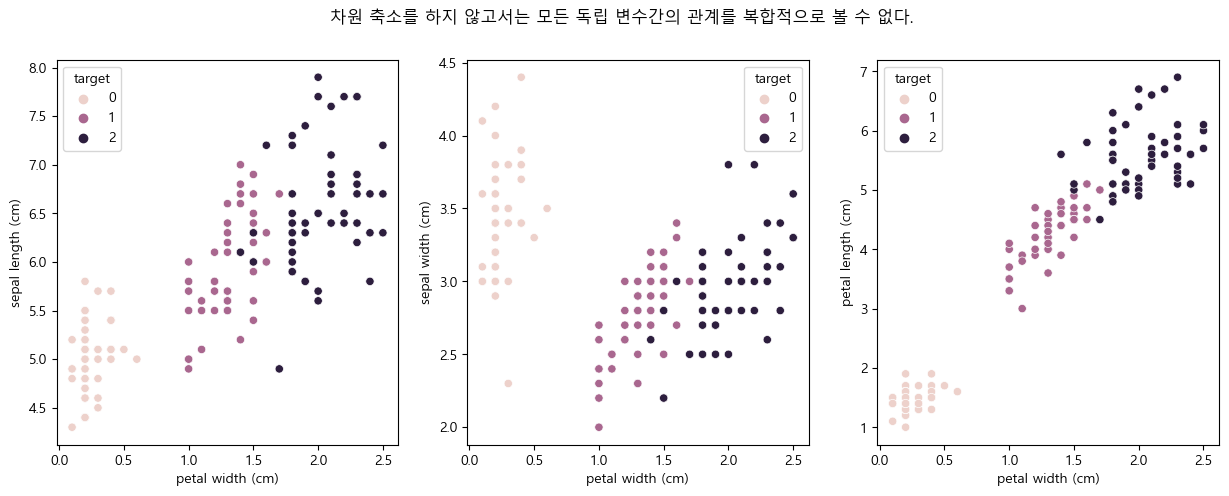

In [84]:
cols = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)']

fig,ax = plt.subplots(ncols = 3,figsize = (15,5))

for i,var in enumerate(cols):
    
    sns.scatterplot(data = data,
                    x = 'petal width (cm)',
                    y = var,
                    hue = 'target',
                    ax = ax[i])


plt.suptitle(' 차원 축소를 하지 않고서는 모든 독립 변수간의 관계를 복합적으로 볼 수 없다.')    

* 차원축소의 결과

In [32]:
def pca(data, dimension):
    
    pca = PCA(n_components = dimension)
    
    target = data.iloc[:,-1]
    
    feature = pca.fit_transform(data.iloc[:,:-1])
    
    result = pd.DataFrame(feature)
    
    result['target'] = target
    
    return result

Text(0, 0.5, '차원 축소 된 Y축')

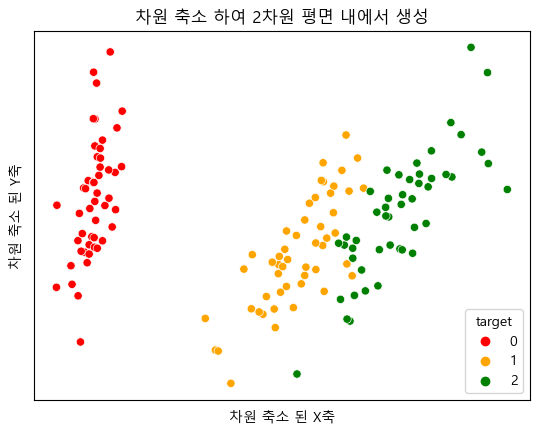

In [142]:
two_dim = pca(data,2)

sns.scatterplot(data = two_dim,
                x = 0,
                y = 1,
                hue = 'target',
                palette = ['red','orange','green'])

plt.title('차원 축소 하여 2차원 평면 내에서 생성')
plt.xticks([])
plt.yticks([])
plt.xlabel('차원 축소 된 X축')
plt.ylabel('차원 축소 된 Y축')

* 3 차원도 가능하다

In [131]:
def make_3dplot(data):
    
    Y = data.iloc[:,-1]
    color = ['red','orange','green']
    colors = {}
    
    for i,uni in enumerate(Y.unique()):
        colors[uni] = color[i]
        
    color_map = data['target'].map(colors)
    
    fig, ax = plt.subplots(ncols = 3,
                            subplot_kw = {'projection':'3d'},
                            figsize = (15,5))
    
    view = [15,45,75]
    
    for i in range(3):
        
        ax[i].scatter(xs = data[0],
                        ys = data[1],
                            zs = data[2],
                            c = color_map,
                            alpha = 0.5)
        ax[i].view_init(10,view[i])

Text(0.5, 0.98, '차원 축소 하여 3차원 공간 내에서 생성')

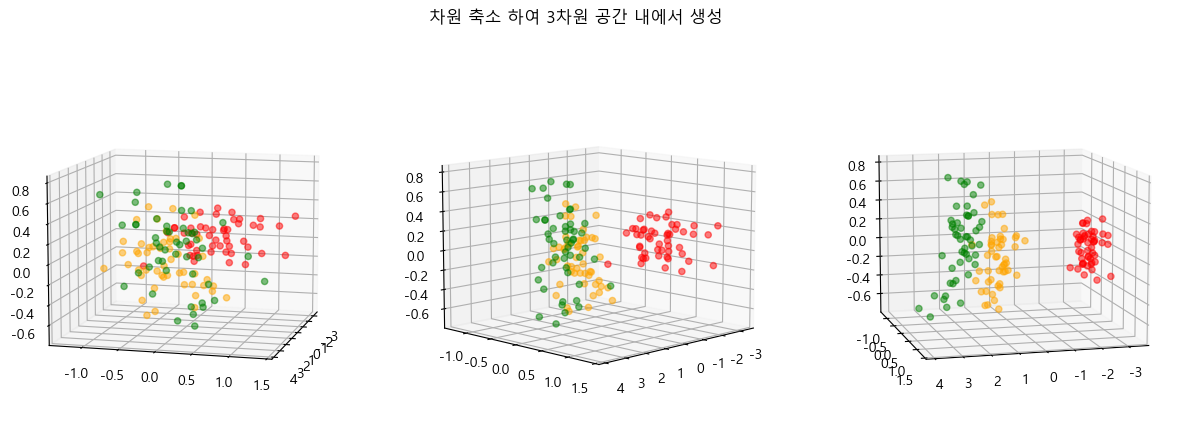

In [133]:
thr_dim = pca(data,3)

make_3dplot(thr_dim)
plt.suptitle('차원 축소 하여 3차원 공간 내에서 생성')

# 우리가 수집한 데이터에도 적용시켜 보자 

In [134]:
df= pd.read_csv('C:/Users/whileduck/Desktop/01.데이터/1.Training/원천데이터/1.걸음걸이/train_activity.csv')
label = pd.read_csv('C:/Users/whileduck/Desktop/01.데이터/1.Training/원천데이터/1.걸음걸이/training_label.csv')

In [135]:
df.head(3)

,EMAIL,activity_average_met,activity_cal_active,activity_cal_total,activity_class_5min,activity_daily_movement,activity_day_end,activity_day_start,activity_high,activity_inactive,...,activity_score_meet_daily_targets,activity_score_move_every_hour,activity_score_recovery_time,activity_score_stay_active,activity_score_training_frequency,activity_score_training_volume,activity_steps,activity_total,CONVERT(activity_class_5min USING utf8),CONVERT(activity_met_1min USING utf8)
0,nia+279@rowan.kr,1.28125,196,2251,...,3353,2020-10-20T03:59:59+09:00,2020-10-19T04:00:00+09:00,0,714,...,78,100,100,54,100,97,4212,207,1/1/2/2/2/2/1/1/1/1/1/1/1/2/2/2/2/2/2/3/3/2/2/...,1.2/0.9/1/0.9/0.9/0.9/0.9/0.9/0.9/0.9/0.9/0.9/...
1,nia+279@rowan.kr,1.25000,145,2159,...,2516,2020-10-21T03:59:59+09:00,2020-10-20T04:00:00+09:00,0,719,...,60,100,100,58,96,96,3306,140,1/1/1/2/2/2/2/2/2/2/2/2/1/1/1/1/1/2/3/3/3/3/2/...,0.9/0.9/1.3/1/0.9/0.9/1.1/0.9/1/0.9/1/0.9/1/0....
2,nia+279@rowan.kr,1.21875,118,2140,...,1716,2020-10-22T03:59:59+09:00,2020-10-21T04:00:00+09:00,0,708,...,43,95,100,55,71,83,2550,131,1/1/1/1/1/1/1/1/1/1/1/1/1/1/1/1/1/1/1/2/3/3/3/...,0.9/0.9/0.9/0.9/0.9/0.9/0.9/0.9/0.9/0.9/0.9/0....


In [136]:
label.head(3) #Email 주소로 sympthom 을 표현하고 있다.

,SAMPLE_EMAIL,DIAG_NM
0,nia+315@rowan.kr,CN
1,nia+014@rowan.kr,MCI
2,nia+220@rowan.kr,CN


In [137]:
labels = dict(np.array(label).reshape(-1,2))

symptom = df['EMAIL'].map(labels) # label 의 맵핑된 정보를 딕셔너리 형태로 변경한 후 변경 내용을 symptom 열에 담는다

In [138]:
# 차원축소에 불필요한 문자형 변수 제거 
# 나중에는 문자형 변수들도 변수로서 사용 할 수 있도록 해야겠다.

drop_col = []

for col in df.columns:
    
    if df[col].dtype == 'object':
        
        drop_col.append(col)
        
df = df.drop(drop_col,axis = 1)

df['target'] = symptom # 맵핑된 정보로 새로운 열 추가 

In [139]:
df

,activity_average_met,activity_cal_active,activity_cal_total,activity_daily_movement,activity_high,activity_inactive,activity_inactivity_alerts,activity_low,activity_medium,activity_met_min_high,...,activity_score,activity_score_meet_daily_targets,activity_score_move_every_hour,activity_score_recovery_time,activity_score_stay_active,activity_score_training_frequency,activity_score_training_volume,activity_steps,activity_total,target
0,1.28125,196,2251,3353,0,714,0,201,6,0,...,87,78,100,100,54,100,97,4212,207,MCI
1,1.25000,145,2159,2516,0,719,0,131,9,0,...,83,60,100,100,58,96,96,3306,140,MCI
2,1.21875,118,2140,1716,0,708,1,125,6,0,...,73,43,95,100,55,71,83,2550,131,MCI
3,1.28125,180,2240,2791,0,705,0,203,5,0,...,70,43,100,100,58,71,59,4009,208,MCI
4,1.46875,374,2559,5393,0,437,0,511,6,0,...,70,43,100,100,89,40,46,8081,517,MCI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9700,1.34375,249,2351,4411,1,780,4,167,22,7,...,61,25,43,100,45,40,95,4972,190,CN
9701,1.53125,570,2682,11057,1,518,1,332,61,7,...,78,43,95,100,76,71,93,11878,394,CN
9702,1.34375,295,2331,5135,4,578,0,173,30,28,...,70,25,100,100,70,40,95,5752,207,CN
9703,1.31250,186,2280,3178,0,778,1,138,18,0,...,66,25,95,100,47,40,93,3852,156,CN


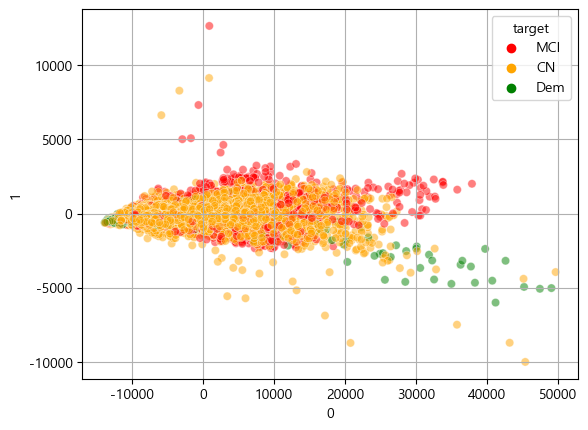

In [143]:
# 차원 축소를 해서 보자 

two_data = pca(df,2)


sns.scatterplot(data = two_data,
                x = 0,
                y = 1,
                hue = 'target',
                palette = ['red','orange','green'],
                alpha = 0.5)

plt.grid()

Text(0.5, 0.98, '차원 축소 하여 3차원 공간 내에서 생성')

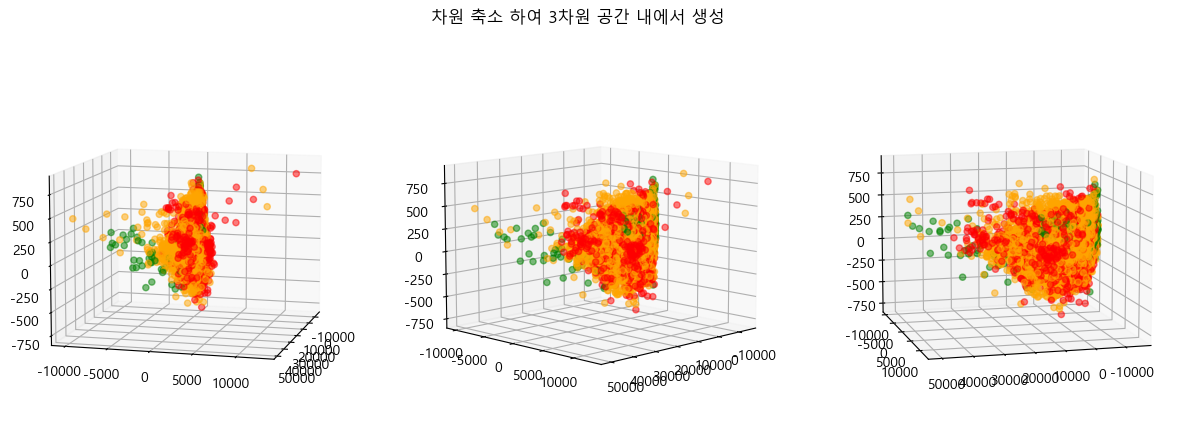

In [146]:
thr_dim = pca(df,3)

make_3dplot(thr_dim)
plt.suptitle('차원 축소 하여 3차원 공간 내에서 생성')

### 2. 분산분석을 통한 변수 선택

In [147]:
from sklearn.feature_selection import SelectKBest, f_classif

In [181]:
X = df.iloc[:,:-1] # Feature set
Y = df.iloc[:,-1] # Target set

In [182]:
k = 10 # F-static이 가장 높은 K 개의 변수만 선택하겠다.
selector = SelectKBest(score_func=f_classif, k=k) # ANOVA test
X_new = selector.fit_transform(X, Y) # (독립변수 , 종속변수)

In [183]:
mask = selector.get_support() # Feature 들 중 F static 이 높은 상위 K 개만 True로 반출
selected_features = X.columns[mask] # Feature list 중 True 인 변수들만 선택 

print('mask : ', mask) 
print('\n')
print('selected_features : ', selected_features)

mask :  [ True False False False False False  True  True False False  True  True
 False False  True  True  True False False False False  True False  True]


selected_features :  Index(['activity_average_met', 'activity_inactivity_alerts', 'activity_low',
       'activity_met_min_inactive', 'activity_met_min_low', 'activity_rest',
       'activity_score', 'activity_score_meet_daily_targets',
       'activity_score_training_volume', 'activity_total'],
      dtype='object')


In [184]:
anova_test = pd.DataFrame({'Feature':X.columns,  
                            'F-static':selector.scores_,
                            'P-value':selector.pvalues_,}).sort_values(by = 'F-static',
                                                                        ascending = False).reset_index(drop = True)

anova_test # Anova test 결과

,Feature,F-static,P-value
0,activity_score_meet_daily_targets,268.781978,2.447066e-114
1,activity_rest,237.134631,2.829913e-101
2,activity_low,177.016121,3.106765e-76
3,activity_total,143.508380,3.794911e-62
4,activity_score,138.679330,4.141490e-60
5,activity_met_min_low,93.074587,9.143456e-41
6,activity_score_training_volume,90.116279,1.667548e-39
7,activity_average_met,67.758672,5.975965e-30
8,activity_met_min_inactive,63.730402,3.180320e-28
9,activity_inactivity_alerts,61.900094,1.937323e-27


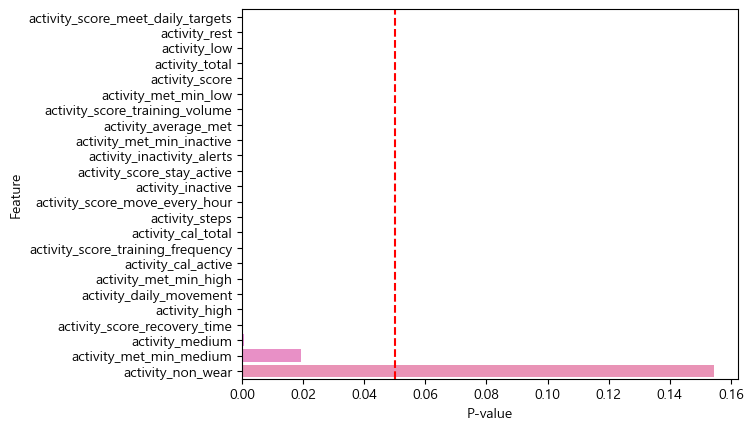

In [188]:
sns.barplot(data = anova_test,
            y = 'Feature',
            x = 'P-value')
plt.axvline(0.05, ls = '--', c = 'r')